# ***Лабораторная работа №1***
# "Бинарная классификация фактографических данных"
# <i>Выполнил: Антипов Д.А. А-01-19</i>

## **Цель работы:**

Получить практические навыки решения задачи бинарной классификации данных. Научиться загружать данные, обучать классификаторы и проводить классификацию. Научиться оценивать точность полученных моделей.

## **Выполнение**

**1.** **В среде Google Collab создать новый ноутбук (Notebook)**

**2. Импортировать необходимые для работы библиотеки и модули**

In [ ]:
# библиотека для работы с массивами
import numpy as np

# Требуемые модули из sklearn
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

**3. Загрузить данные в соответствие с вариантом 1 (*вариант 1: класс - blobs, random_state = 34, cluster_std	= 1.5, centers = 2*)**

In [ ]:
X, y = make_blobs(n_samples=1000,
                  centers = 2 ,
                  random_state = 34,
                  cluster_std  = 1.5,
                  shuffle = 1)

**4. Вывести первые 15 элементов выборки (координаты точек и метки класса)**

In [ ]:
print ("Координаты точек: ")
print (X[:15])
print ("Метки класса: ")
print (y[:15])

Координаты точек: 
[[ -9.15541398   5.567453  ]
 [ -6.30919733   4.80946373]
 [ -4.93529308   5.24523736]
 [ -9.98295387   1.02625097]
 [-11.74711727   6.85252304]
 [ -9.11277682   4.65801985]
 [ -6.75326047   2.10008417]
 [ -8.59020291   4.3259561 ]
 [ -7.36408533   1.90079458]
 [ -5.79879793   2.03449014]
 [ -7.84250721   2.54344005]
 [-11.0360955    2.67446478]
 [ -8.53039837   2.53299185]
 [-10.03692566   7.53493701]
 [-11.17792178   6.79679232]]
Метки класса: 
[0 1 1 1 0 0 1 1 1 1 1 0 1 0 0]


**5. Отобразить на графике сгенерированную выборку. Объекты разных классов должны иметь разные цвета.**

<function matplotlib.pyplot.show(close=None, block=None)>

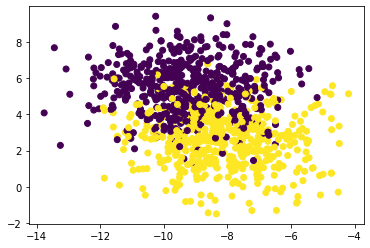

In [ ]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show

**6. Разбить данные на обучающую (train) и тестовую (test) выборки в пропорции 75% - 25% соответственно.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 34)

In [ ]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

**7. Отобразить на графике обучающую и тестовую выборки. Объекты разных классов должны иметь разные цвета.**

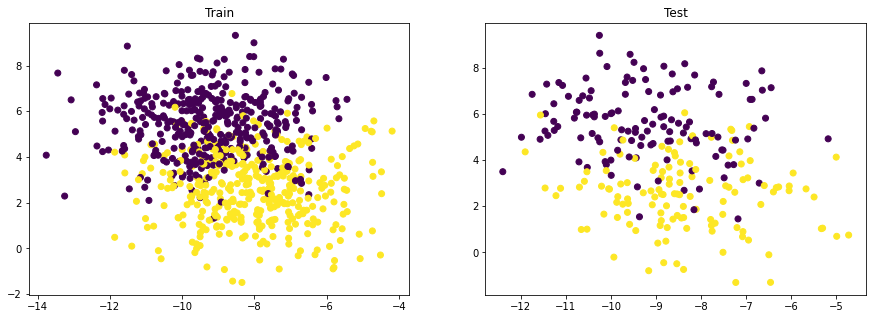

In [ ]:
plt.figure(figsize=(15, 5))

# Рисунок 1
plt.subplot(1, 2, 1)
plt.title('Train')
plt.scatter (X_train[:,0], X_train[:,1], c = y_train)

# Рисунок 2
plt.subplot(1, 2, 2)
plt.title('Test')
plt.scatter (X_test[:,0], X_test[:,1], c = y_test)

plt.show()

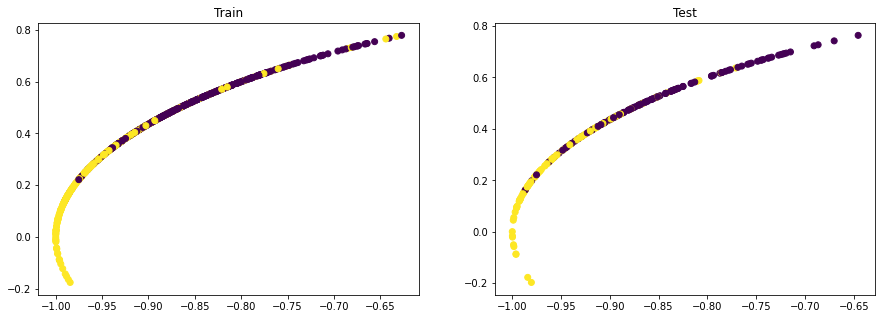

In [ ]:
plt.figure(figsize=(15, 5))

# Рисунок 1
plt.subplot(1, 2, 1)
plt.title('Train')
plt.scatter (X_train_norm[:,0], X_train_norm[:,1], c = y_train)

# Рисунок 2
plt.subplot(1, 2, 2)
plt.title('Test')
plt.scatter (X_test_norm[:,0], X_test_norm[:,1], c = y_test)

plt.show()

**8. Реализовать модели классификаторов, обучить их на обучающем множестве. Применить модели на тестовой выборке, вывести результаты классификации:**
*   Истинные и предсказанные метки классов
*   Матрицу ошибок (confusion matrix)
*   Значения полноты, точности, f1-меры и аккуратности
*   Значение площади под кривой ошибок (AUC ROC)
*   Отобразить на графике область принятия решений по каждому классу



*   **Метод к-ближайших соседей (n_neighbors = 1)**

Prediction and test: 
[0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1
 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1]
[0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0

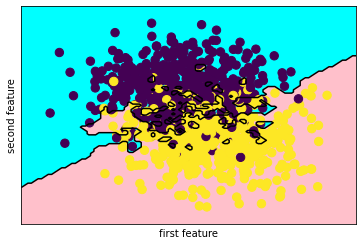

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

*   **Метод к-ближайших соседей (n_neighbors = 3)**

Prediction and test: 
[0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1]
[0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0

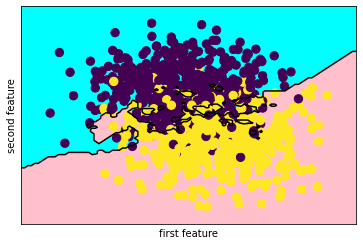

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

*   **Метод к-ближайших соседей (n_neighbors = 9)**

Prediction and test: 
[0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1]
[0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0

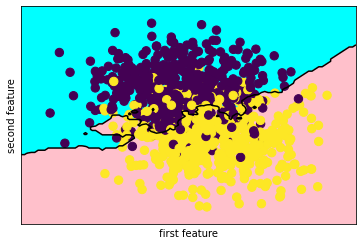

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

*   **Наивный байесовский метод**

Prediction and test: 
[0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1]
[0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0

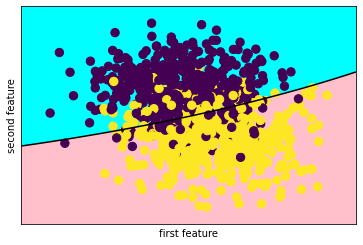

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

*   **Случайный лес (n_estimators = 5)**

Prediction and test: 
[0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1]
[0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0

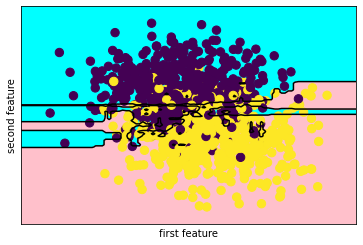

In [ ]:
rnf = RandomForestClassifier(n_estimators = 5)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

*   **Случайный лес (n_estimators = 15)**

Prediction and test: 
[0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1]
[0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0

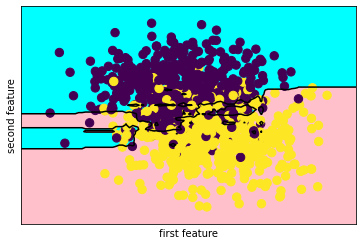

In [ ]:
rnf = RandomForestClassifier(n_estimators = 15)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

*   **Случайный лес (n_estimators = 50)**

Prediction and test: 
[0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1]
[0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0
 1 0 1 1 1 0 1 1 1 0

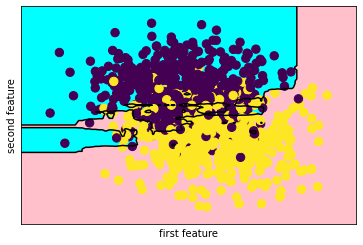

In [ ]:
rnf = RandomForestClassifier(n_estimators = 50)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**9. По результатам п.8 занести в отчет таблицу с результатами классификации всеми методами.**


|        Метод        | Параметр | Accuracy | AUC ROC | Precision | Recall | F1-score |
|:-------------------:|:--------:|:--------:|:-------:|:---------:|:------:|:--------:|
| k-ближайших соседей |     1    |   0,804  |  0,804  |    0,8    |   0,8  |    0,8   |
| k-ближайших соседей |     3    |   0,828  |  0,828  |    0,83   |  0,83  |   0,83   |
| k-ближайших соседей |     9    |   0,844  |  0,844  |    0,85   |  0,84  |   0,84   |
| Наивный байесовский |     -    |   0,852  |  0,852  |    0,85   |  0,85  |   0,85   |
|    Случайный лес    |     5    |   0,816  |  0,816  |    0,82   |  0,82  |   0,82   |
|    Случайный лес    |    15    |   0,856  |  0,856  |    0,86   |  0,86  |   0,86   |
|    Случайный лес    |    50    |   0,844  |  0,844  |    0,85   |  0,84  |   0,84   |

**Вывод:** наилучшие значения метрик были получены методом классификации случайного леса с параметром n_estimators=15. Это значит, что при разбиении исходных данных на обучающую и тестовую выборки в соотношении 75% - 25% данный метод классификации можно считать наилучшим. По графикам области принятия решения видно, что граница между классами имеет довольно сложную форму. Наиболее естесственная граница была получена наивным байесовским методом.

**10.** **Изучить, как изменится качество классификации в случае другого разбиения выборки на обучающую и тестовую. Для этого повторить пункты 6, передав в параметр random_state новое значение, и пункты 8-9 дважды.**

* **Random_state = 42**

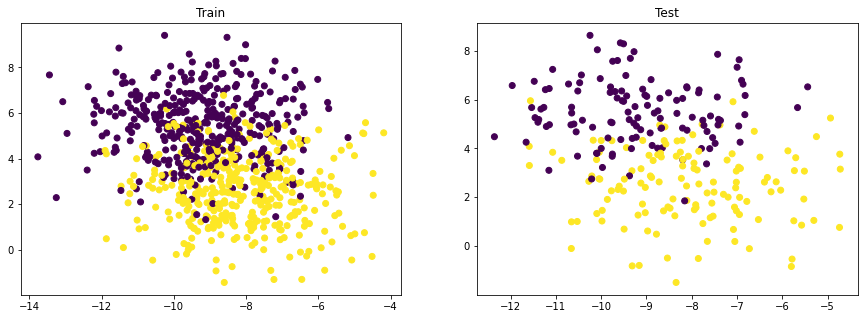

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
plt.figure(figsize=(15, 5))

# Рисунок 1
plt.subplot(1, 2, 1)
plt.title('Train')
plt.scatter (X_train[:,0], X_train[:,1], c = y_train)

# Рисунок 2
plt.subplot(1, 2, 2)
plt.title('Test')
plt.scatter (X_test[:,0], X_test[:,1], c = y_test)

plt.show()

* **Метод к-ближайших соседей (n_neighbors = 1)**

Prediction and test: 
[0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1]
[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0

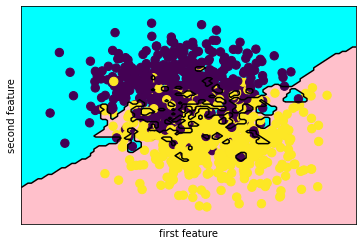

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Метод к-ближайших соседей (n_neighbors = 3)**

Prediction and test: 
[0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1]
[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0

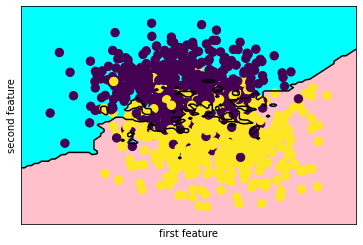

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Метод к-ближайших соседей (n_neighbors = 9)**

Prediction and test: 
[1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1]
[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0

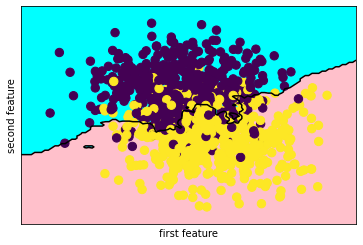

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Наивный байесовский метод**

Prediction and test: 
[1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1
 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1]
[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0

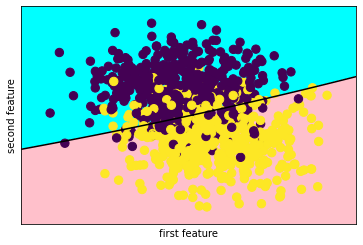

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Случайный лес (n_estimators = 5)**

Prediction and test: 
[0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1]
[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0

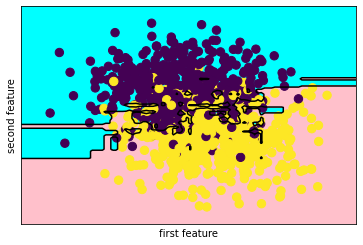

In [ ]:
rnf = RandomForestClassifier(n_estimators = 5)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Случайный лес (n_estimators = 15)**

Prediction and test: 
[0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1]
[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0

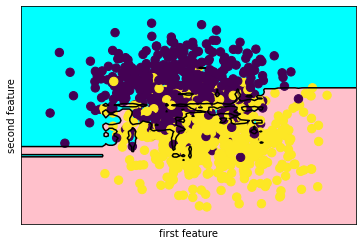

In [ ]:
rnf = RandomForestClassifier(n_estimators = 15)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Случайный лес (n_estimators = 50)**

Prediction and test: 
[1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1]
[0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 0 0 1 0 0 0

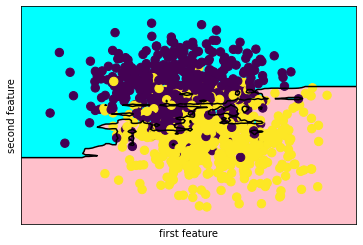

In [ ]:
rnf = RandomForestClassifier(n_estimators = 50)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**Таблица результатов классификации по всем методам:**


| Метод               | Параметр | Accuracy | AUC ROC | Precision | Recall | F1-score |
|---------------------|----------|----------|---------|-----------|--------|----------|
| k-ближайших соседей | 1        | 0.84     | 0.841   | 0.84      | 0.84   | 0.84     |
| k-ближайших соседей | 3        | 0.864    | 0.864   | 0.86      | 0.86   | 0.86     |
| k-ближайших соседей | 9        | 0.888    | 0.888   | 0.89      | 0.89   | 0.89     |
| Наивный байесовский | -        | 0.86     | 0.861   | 0.86      | 0.86   | 0.86     |
| Случайный лес       | 5        | 0.876    | 0.876   | 0.88      | 0.88   | 0.88     |
| Случайный лес       | 15       | 0.884    | 0.884   | 0.88      | 0.88   | 0.88     |
| Случайный лес       | 50       | 0.88     | 0.88    | 0.88      | 0.88   | 0.88     |

**Вывод:** при изменнеии параметра random_state для разбиении выборки на обучающую и тестовую наилучшим, судя по метрикам, оказался метод классификации k-ближайших соседей с параметром n_neighbors = 9. По графикам области принятия решений видно, что разделяющая граница довольно четко отделяет большинство точек одного класса от другого, имея при все при этом довольно естесственный,    незамысловатый вид кривой.

* **Random_state = 67**

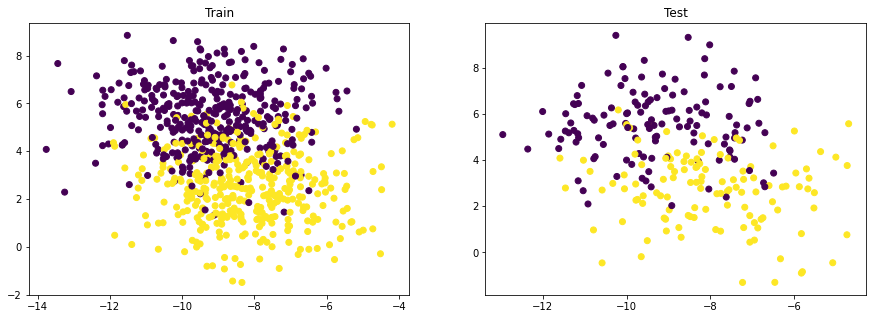

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 67)
plt.figure(figsize=(15, 5))

# Рисунок 1
plt.subplot(1, 2, 1)
plt.title('Train')
plt.scatter (X_train[:,0], X_train[:,1], c = y_train)

# Рисунок 2
plt.subplot(1, 2, 2)
plt.title('Test')
plt.scatter (X_test[:,0], X_test[:,1], c = y_test)

plt.show()

* **Метод к-ближайших соседей (n_neighbors = 1)**

Prediction and test: 
[1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0]
[1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1

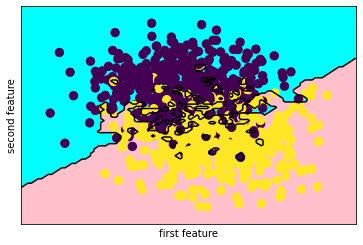

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Метод к-ближайших соседей (n_neighbors = 5)**

Prediction and test: 
[1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]
[1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1

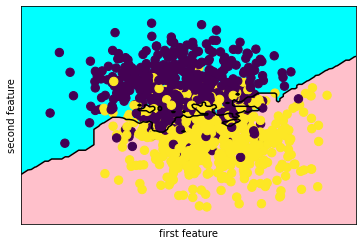

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Метод к-ближайших соседей (n_neighbors = 9)**

Prediction and test: 
[1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]
[1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1

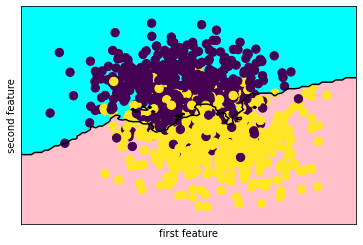

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Наивный байесовский метод**

Prediction and test: 
[1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0]
[1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1

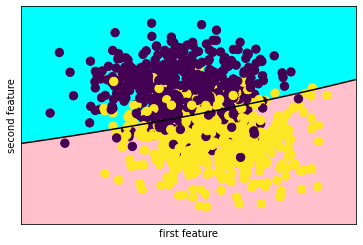

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Случайный лес (n_estimators = 5)**


Prediction and test: 
[1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0]
[1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1

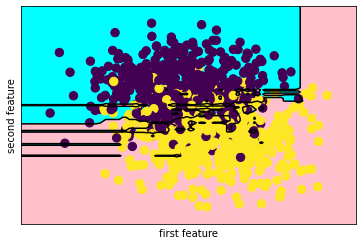

In [ ]:
rnf = RandomForestClassifier(n_estimators = 5)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Случайный лес (n_estimators = 15)**

Prediction and test: 
[1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]
[1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1

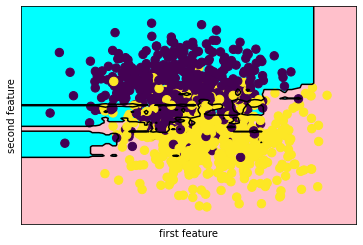

In [ ]:
rnf = RandomForestClassifier(n_estimators = 15)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

* **Случайный лес (n_estimators = 50)**

Prediction and test: 
[1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0]
[1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1

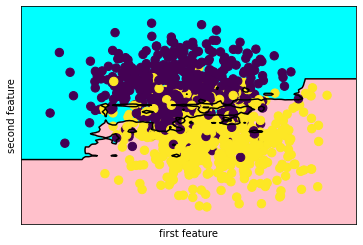

In [ ]:
rnf = RandomForestClassifier(n_estimators = 50)
rnf.fit(X_train, y_train)
prediction = rnf.predict(X_test)

print('Prediction and test: ')
print(prediction)
print(y_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, prediction))

print('Accuracy score: ', accuracy_score(prediction, y_test))

print(classification_report(y_test, prediction))

print('roc_auc_score:', roc_auc_score(y_test, prediction))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(rnf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70)

**Таблица результатов классификации по всем методам:**

| Метод               | Параметр | Accuracy | AUC ROC | Precision | Recall | F1-score |
|---------------------|----------|----------|---------|-----------|--------|----------|
| k-ближайших соседей | 1        | 0.84     | 0.841   | 0.84      | 0.84   | 0.84     |
| k-ближайших соседей | 3        | 0.864    | 0.864   | 0.86      | 0.86   | 0.86     |
| k-ближайших соседей | 9        | 0.888    | 0.888   | 0.89      | 0.89   | 0.89     |
| Наивный байесовский | -        | 0.86     | 0.861   | 0.86      | 0.86   | 0.86     |
| Случайный лес       | 5        | 0.876    | 0.876   | 0.88      | 0.88   | 0.88     |
| Случайный лес       | 15       | 0.884    | 0.884   | 0.88      | 0.88   | 0.88     |
| Случайный лес       | 50       | 0.88     | 0.88    | 0.88      | 0.88   | 0.88     |

**Вывод:** при значении параметра random_state, равным 67, для разбиении выборки на обучающую и тестовую наилучшим, судя по метрикам, оказался метод классификации k-ближайших соседей с параметром n_neighbors = 9. Довольно близкие к ниму оказались методы k-ближайших соседей с параметром n_neighbors = 9 и метод случайного леса с параметром n_estimators = 50. Однако граница области принятия решений для модели случайного леса имеет довольно сложную, замысловатую форму кривой, в отличии от остальных методов.

**11. По результатам трех экспериментов составить итоговую таблицу о качестве классификаци каждым методом, включив в нее значения полноты, точности, f1-меры, аккуратности и площади под кривой ошибок. Сделать выводы о наиболее подходящем методе классификации ваших данных**

| Метод               | Параметр | Accuracy | AUC ROC | Precision | Recall | F1-score |
|---------------------|----------|----------|---------|-----------|--------|----------|
| k-ближайших соседей | 1        | 0,821    | 0,821   | 0,82      | 0,82   | 0,82     |
| k-ближайших соседей | 3        | 0,845    | 0,845   | 0,843     | 0,843  | 0,843    |
| k-ближайших соседей | 9        | 0,86     | 0,86    | 0,863     | 0,86   | 0,86     |
| Наивный байесовский | -        | 0,848    | 0,848   | 0,847     | 0,846  | 0,846    |
| Случайный лес       | 5        | 0,837    | 0,836   | 0,84      | 0,84   | 0,84     |
| Случайный лес       | 15       | 0,858    | 0,858   | 0,86      | 0,86   | 0,86     |
| Случайный лес       | 50       | 0,856    | 0,855   | 0,86      | 0,86   | 0,86     |

**Вывод:** по усредненным результатам лучше всего себя показал метод k-ближайших соседей с параметром n_neighbors = 9. Довольно близкие к данному методу покзаатели метрики имеет метод случайного леса с параметром (n_estimators = 15, 50). Смотря на график области принятия решений, можно сказать, что модель случайного леса имеет склонность к переобучению и, как следствие, к потере обобщающей способности, так как разделяющая граница слишком точно отделяет обучающее множество от тестового.